<h1>IBM Advanced Data Science Capstone Project</h1>

<h2>Classification of Images with Neural Networks</h2>

<h3>Yaroslav Aulin</h3>

yaroslav.v.aulin@gmail.com

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
!pip install opencv-python

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set(font_scale=1.4)
from tqdm import tqdm

We are using the following dataset
https://www.kaggle.com/puneet6060/intel-image-classification

In [5]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [6]:
# load data from directory

def load_data():
    
    datasets = ['data/seg_train', 'data/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')/255.0
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))

    return output

In [8]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [7]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  3%|▎         | 83/2382 [00:00<00:02, 826.35it/s]

Loading data/seg_train


 25%|██▌       | 127/501 [00:00<00:00, 1261.40it/s]

Loading data/seg_test


100%|██████████| 437/437 [00:00<00:00, 924.99it/s]


In [8]:
train_images.shape

(14034, 150, 150, 3)

In [9]:
train_labels.shape

(14034,)

In [10]:
test_images.shape

(3000, 150, 150, 3)

In [11]:
test_labels.shape

(3000,)

In [12]:
#shuffle images

train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [13]:
# display a random image

def display_random_image(class_names, images, labels):

    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()


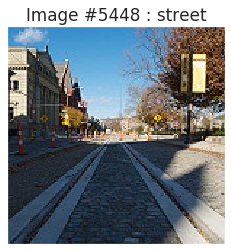

In [14]:
display_random_image(class_names, train_images, train_labels)

In [63]:
def display_examples(class_names, images, labels):
        
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

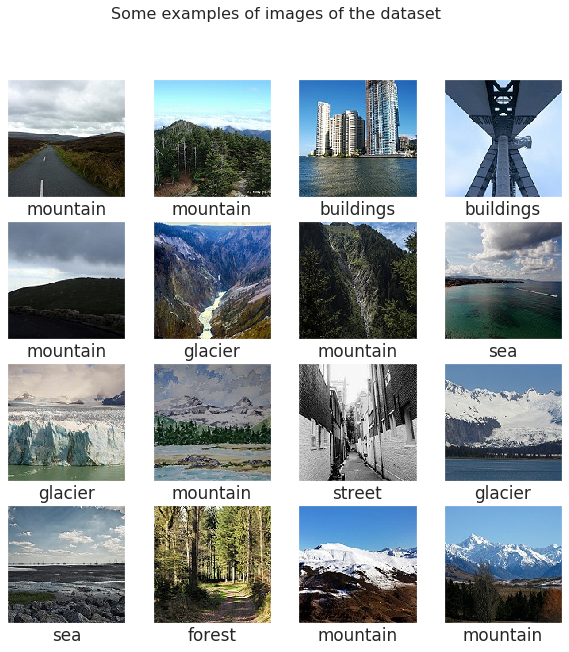

In [64]:
display_examples(class_names, train_images, train_labels)

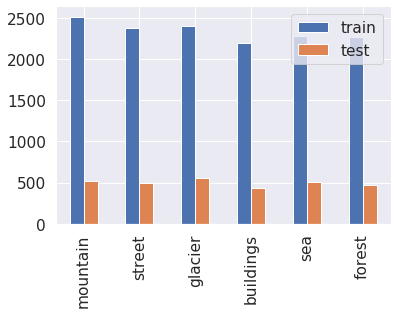

In [17]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

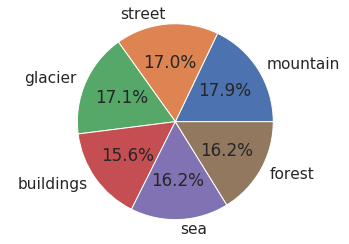

In [18]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.show()


<h4>CNN model</h4>

In [19]:
# create CNN to predict labels

model = Models.Sequential()

model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(128,activation='relu'))
model.add(Layers.Dense(6,activation='softmax'))
      
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [21]:
trained = model.fit(train_images,train_labels,epochs=20,batch_size=128,validation_split=0.20)

Epoch 1/20
88/88 [==============================] - 171s 2s/step - loss: 1.4975 - accuracy: 0.4984 - val_loss: 0.9014 - val_accuracy: 0.6587
Epoch 2/20
88/88 [==============================] - 147s 2s/step - loss: 0.8037 - accuracy: 0.7043 - val_loss: 0.7158 - val_accuracy: 0.7406
Epoch 3/20
88/88 [==============================] - 168s 2s/step - loss: 0.6447 - accuracy: 0.7687 - val_loss: 0.6503 - val_accuracy: 0.7649
Epoch 4/20
88/88 [==============================] - 173s 2s/step - loss: 0.5167 - accuracy: 0.8193 - val_loss: 0.5978 - val_accuracy: 0.7845
Epoch 5/20
88/88 [==============================] - 159s 2s/step - loss: 0.4158 - accuracy: 0.8557 - val_loss: 0.5729 - val_accuracy: 0.8001
Epoch 6/20
88/88 [==============================] - 172s 2s/step - loss: 0.3181 - accuracy: 0.8951 - val_loss: 0.6410 - val_accuracy: 0.7688
Epoch 7/20
88/88 [==============================] - 168s 2s/step - loss: 0.2505 - accuracy: 0.9219 - val_loss: 0.6359 - val_accuracy: 0.7870
Epoch 8/20
88

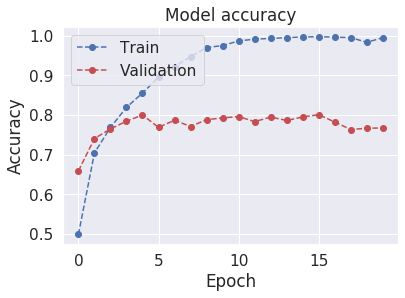

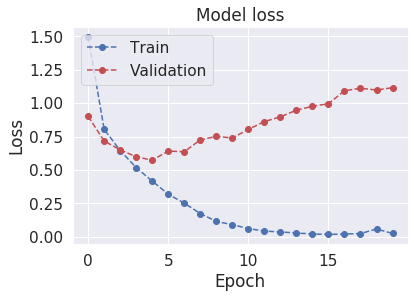

In [23]:
plt.plot(trained.history['accuracy'],'bo--')
plt.plot(trained.history['val_accuracy'],'ro--')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'],'bo--')
plt.plot(trained.history['val_loss'],'ro--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# evaluate the model on test set
test_loss = model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 11s 117ms/step - loss: 1.2772 - accuracy: 0.7523


In [25]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


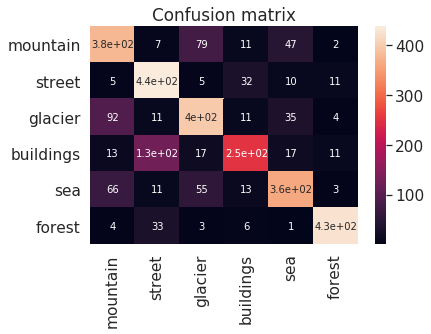

In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt             
import seaborn as sns; sns.set(font_scale=1.4)

CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [27]:
# feature extraction with VGG Image net
# let's use pretrained VGG16 network

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model1 = VGG16(weights='imagenet', include_top=False)

In [28]:
%%time
train_features = model1.predict(train_images[0:100])


CPU times: user 33.6 s, sys: 859 ms, total: 34.4 s
Wall time: 8.92 s


33.5 s for 100 images
17000 images: 170 * 33.5 s =  95 min

In [29]:
%%time

train_features = model1.predict(train_images)
test_features = model1.predict(test_images)


CPU times: user 1h 55min 5s, sys: 3min 6s, total: 1h 58min 12s
Wall time: 30min 45s


In [32]:
# principal component analysis

n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # 
C1 = C[:,0]
C2 = C[:,1]

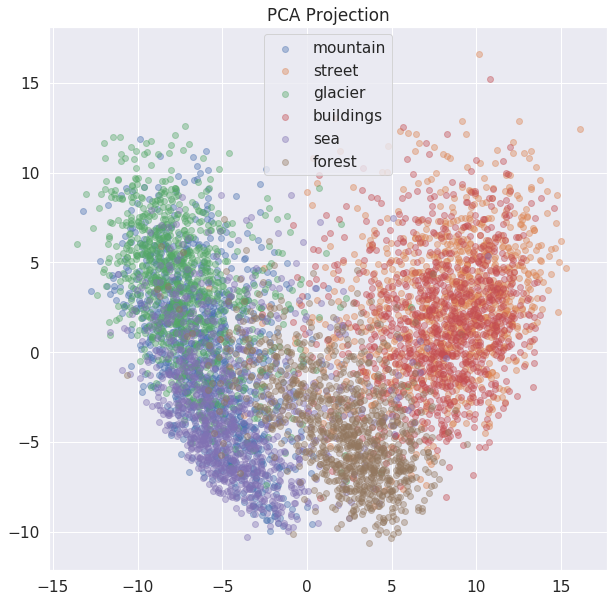

In [46]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [50]:
# create NN to predict labels

model2 = Models.Sequential()


model2.add(Layers.Flatten(input_shape = (x, y, z)))
model2.add(Layers.Dense(100,activation='relu'))
model2.add(Layers.Dense(6,activation='softmax'))
      
model2.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               819300    
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 606       
Total params: 819,906
Trainable params: 819,906
Non-trainable params: 0
_________________________________________________________________


In [51]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# train a neural network on features extracted from VGG

trained2 = model2.fit(train_features, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 1s 13ms/step - loss: 0.5028 - accuracy: 0.8169 - val_loss: 0.3346 - val_accuracy: 0.8767
Epoch 2/20
88/88 [==============================] - 1s 12ms/step - loss: 0.2958 - accuracy: 0.8934 - val_loss: 0.3116 - val_accuracy: 0.8849
Epoch 3/20
88/88 [==============================] - 1s 15ms/step - loss: 0.2323 - accuracy: 0.9171 - val_loss: 0.3248 - val_accuracy: 0.8810
Epoch 4/20
88/88 [==============================] - 1s 12ms/step - loss: 0.1786 - accuracy: 0.9384 - val_loss: 0.3228 - val_accuracy: 0.8824
Epoch 5/20
88/88 [==============================] - 1s 12ms/step - loss: 0.1557 - accuracy: 0.9474 - val_loss: 0.3181 - val_accuracy: 0.8853
Epoch 6/20
88/88 [==============================] - 1s 12ms/step - loss: 0.1271 - accuracy: 0.9582 - val_loss: 0.3185 - val_accuracy: 0.8835
Epoch 7/20
88/88 [==============================] - 1s 12ms/step - loss: 0.1032 - accuracy: 0.9693 - val_loss: 0.3322 - val_accuracy: 0.8856
Epoch 8/20
88

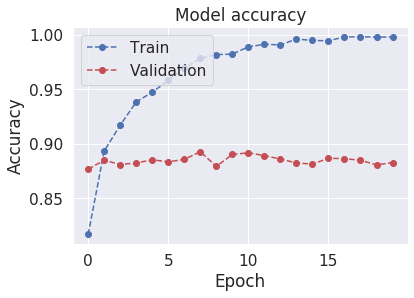

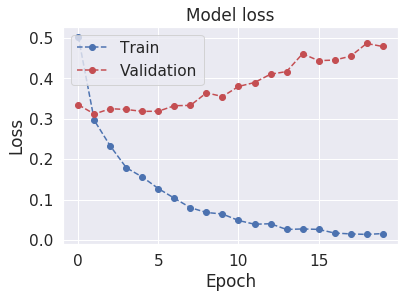

In [53]:
plt.plot(trained2.history['accuracy'],'bo--')
plt.plot(trained2.history['val_accuracy'],'ro--')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained2.history['loss'],'bo--')
plt.plot(trained2.history['val_loss'],'ro--')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
# evaluate the model on test set
test_loss2 = model2.evaluate(test_features,test_labels, verbose=1)

94/94 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.8747


In [58]:
predictions2 = model2.predict(test_features)     # Vector of probabilities
pred_labels2 = np.argmax(predictions2, axis = 1) # We take the highest probability


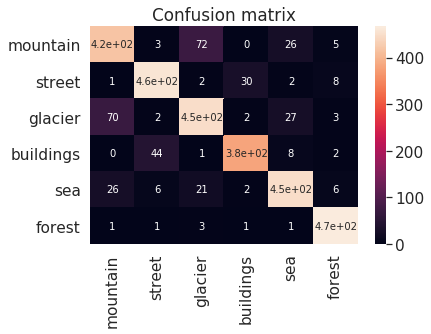

In [59]:
# confusion matrix

CM2 = confusion_matrix(test_labels, pred_labels2)
ax = plt.axes()
sns.heatmap(CM2, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [60]:
# some examples of mislabeled images


def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

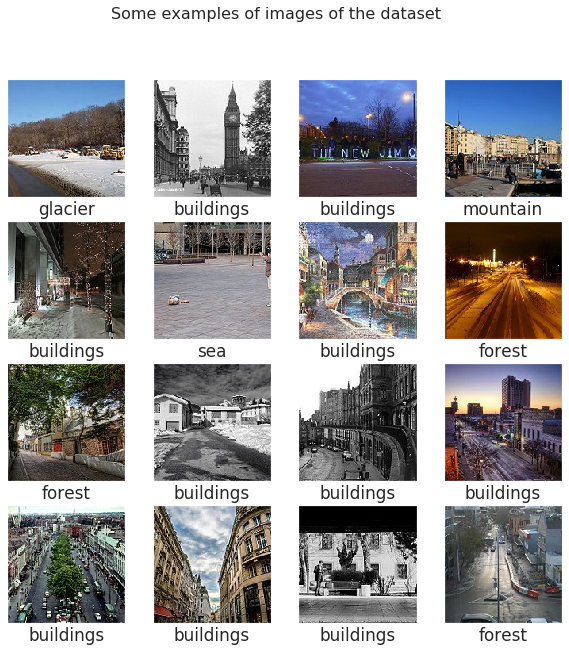

In [65]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels2)
  